/Users/user/opt/anaconda3/lib/python3.8/site-packages/dask/dataframe/utils.py:369: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
/Users/user/opt/anaconda3/lib/python3.8/site-packages/dask/dataframe/utils.py:369: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
/Users/user/opt/anaconda3/lib/python3.8/site-packages/dask/dataframe/utils.py:369: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)


Tracking element #1 (s = 0 m, SourceBasic, stage 0)
Tracking element #2 (s = 0.1 m, DriftBasic, stage 0)
Tracking element #3 (s = 0.6 m, StageBasic, stage 1)
Tracking element #4 (s = 2.6 m, DriftBasic, stage 1)
Tracking element #5 (s = 3.6 m, DipoleSpectrometerBasic, stage 1)
Tracking element #6 (s = 9.6 m, DriftBasic, stage 1)
Tracking element #7 (s = 10.6 m, QuadrupoleVer, stage 1)
Tracking element #8 (s = 11.6 m, QuadrupoleHor, stage 1)


../opal/classes/experiment.py:37: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  c0 = ax.pcolor(xedges*1e3, yedges*1e3, abs(dQdxdy)*1e6, cmap='GnBu')
../opal/classes/beam.py:347: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  p = ax.pcolor(zs*1e6, Es/1e9, -dQdzdE*1e15, cmap='GnBu')


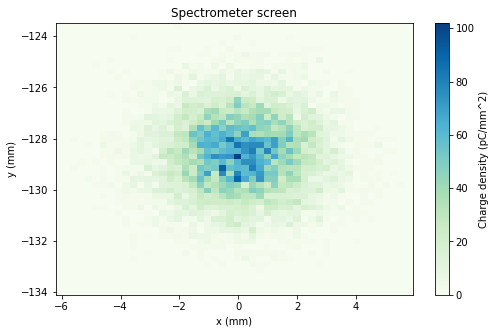

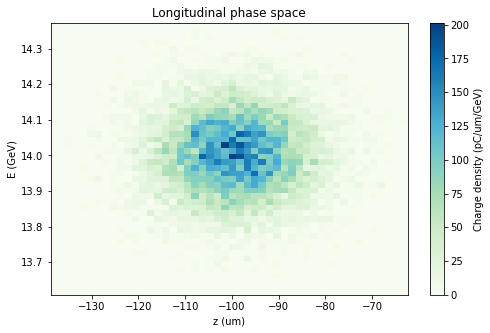

In [1]:
import sys
sys.path.append('../')
from opal import SourceBasic, StageBasic, BeamDeliverySystemFACET2Basic, SpectrometerFACET2Basic, Experiment

# define beam
source = SourceBasic()
source.L = 0 # [m]
source.Q = -1e-9 # [C]
source.E0 = 10e9 # [eV]
source.sigE = 0.01*source.E0 # [eV]
source.sigz = 10e-6 # [m]
source.z = -100e-6 # [m]
source.emitnx = 5e-6 # [m rad]
source.emitny = 2e-6 # [m rad]
source.betax = 20e-3 # [m]
source.betay = source.betax
source.Npart = 10000

# define beamline
bds = BeamDeliverySystemFACET2Basic()
bds.beta_waist = 0.05 # [m]
bds.s_waist = 0 # [m]

# define stage
stage = StageBasic()
stage.deltaE = 4e9 # [eV]
stage.L = 0.5 # [m]
#stage.n0 = 1e22 # [m^-3]
#stage.kRb = 2.5

# define spectrometer
spectrometer = SpectrometerFACET2Basic()
spectrometer.B_dip = 0.5 # [T]

# define experiment
experiment = Experiment(source, bds, stage, spectrometer)
beam = experiment.run("FACET-II")

# see output
experiment.plotSpectrometerScreen()
beam.plotLPS()

In [2]:
pip install openpmd_api

     |████████████████████████████████| 5.5 MB 162 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.
